In [1]:

import pandas as pd
# Box Plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import modules
from matplotlib_venn import venn2 

  

In [2]:
df_grammy = pd.read_csv ("grammy_toMerge.csv")

df_billboard = pd.read_csv (r"billboard_toMerge.csv")


In [4]:
#copy dataframes
billboard_copy=df_billboard.copy(deep=True)
grammy_copy=df_grammy.copy(deep=True)

In [5]:
billboard_copy.head()

,Unnamed: 0,Artist,Name,Genre,Unnamed: 0.1,Weekly_rank_avg,Peak_Position,Weeks_on_Chart
0,0,LIL NAS X,OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.000000,0.118093,0.000000,0.058824
1,1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.000155,0.384799,0.136735,0.209412
2,2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.000310,0.450932,0.010204,0.129412
3,3,KHALID,TALK,"SYNTH-POP,POP",0.000465,0.307484,0.020408,0.211765
4,4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.000619,0.354845,0.010204,0.058824


In [5]:
df_grammy.head()

,Unnamed: 0,Name,Artist,grammy_win
0,0,THIS IS AMERICA,CHILDISH GAMBINO,1
1,1,JOANNE (WHERE DO YOU THINK YOU'RE GOIN'?),LADY GAGA,1
2,2,SHALLOW,"LADY GAGA, BRADLEY COOPER",1
3,3,ELECTRICITY,"SILK CITY, DUA LIPA",1
4,4,WHEN BAD DOES GOOD,CHRIS CORNELL,1


In [6]:
# applying merge with more parameters
merged_bill_grammy=billboard_copy.merge(grammy_copy[['Name', 'Artist','grammy_win']], on = ['Name','Artist'], how = 'left')
#left ile billboard satırları kaldı ama peak, wekks on chart bilgileri olan grammy şarkıları gelmemiş oldu. Ya outer yapıp normalize edilecek ya da böyle kalacak.

In [7]:
merged_bill_grammy.isna().sum()

Unnamed: 0            0
Artist                0
Name                  0
Genre                 0
Unnamed: 0.1          0
Weekly_rank_avg       0
Peak_Position         0
Weeks_on_Chart        0
grammy_win         6287
dtype: int64

In [8]:
#replace grammy_win column na values with zero(0)
merged_bill_grammy_copy=merged_bill_grammy.copy(deep=True)
merged_bill_grammy_copy['grammy_win'] = merged_bill_grammy_copy['grammy_win'].fillna(0)

In [9]:
merged_bill_grammy_copy.isna().sum()

Unnamed: 0         0
Artist             0
Name               0
Genre              0
Unnamed: 0.1       0
Weekly_rank_avg    0
Peak_Position      0
Weeks_on_Chart     0
grammy_win         0
dtype: int64

In [10]:
merged_bill_grammy_copy.head()

,Unnamed: 0,Artist,Name,Genre,Unnamed: 0.1,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,0,LIL NAS X,OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.000000,0.118093,0.000000,0.058824,0.0
1,1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.000155,0.384799,0.136735,0.209412,0.0
2,2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.000310,0.450932,0.010204,0.129412,0.0
3,3,KHALID,TALK,"SYNTH-POP,POP",0.000465,0.307484,0.020408,0.211765,0.0
4,4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.000619,0.354845,0.010204,0.058824,0.0


In [11]:
merged_bill_grammy_copy=merged_bill_grammy_copy.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [12]:
merged_bill_grammy_copy

,Artist,Name,Genre,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,grammy_win
0,LIL NAS X,OLD TOWN ROAD,"COUNTRY,ATLANTA,ALTERNATIVE COUNTRY,HIP-HOP,TR...",0.118093,0.000000,0.058824,0.0
1,"SHAWN MENDES, CAMILA CABELLO",SENORITA,POP,0.384799,0.136735,0.209412,0.0
2,BILLIE EILISH,BAD GUY,"HIP-HOP,DARK POP,HOUSE,TRAP,MEMES,ALTERNATIVE ...",0.450932,0.010204,0.129412,0.0
3,KHALID,TALK,"SYNTH-POP,POP",0.307484,0.020408,0.211765,0.0
4,"ED SHEERAN, JUSTIN BIEBER",I DON'T CARE,"CANADA,UK,DANCE,DANCE-POP,POP",0.354845,0.010204,0.058824,0.0
...,...,...,...,...,...,...,...
6454,FATBOY SLIM,PRAISE YOU,"TECHNO,POP",0.883851,0.357143,0.211765,0.0
6455,COLLIN RAYE,ANYONE ELSE,COUNTRY,0.901129,0.367347,0.211765,0.0
6456,TRICK DADDY,NANN,RAP,0.690269,0.622449,0.211765,0.0
6457,CLAY WALKER,SHE'S ALWAYS RIGHT,POP,0.835929,0.744898,0.047059,0.0


In [14]:
merged_bill_grammy_copy.to_csv("merged_df.csv")

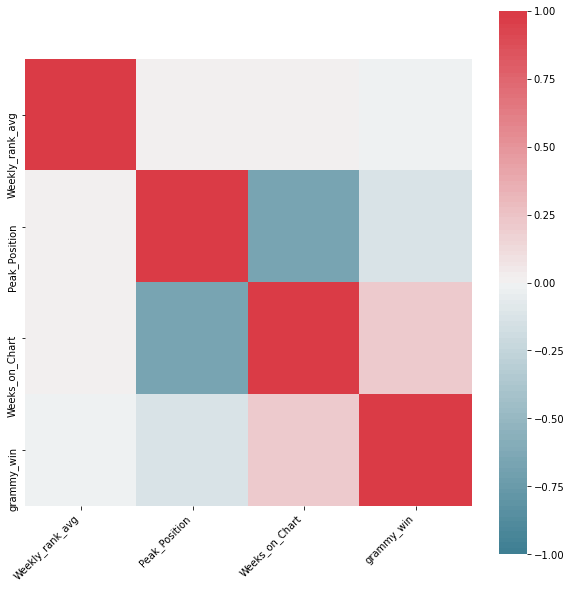

In [15]:
#Correlation matrix-heat map 
f = plt.figure(figsize=(10, 10))
corr = merged_bill_grammy_copy.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,  cmap = sns.diverging_palette(220, 10, n=100),  square=True)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

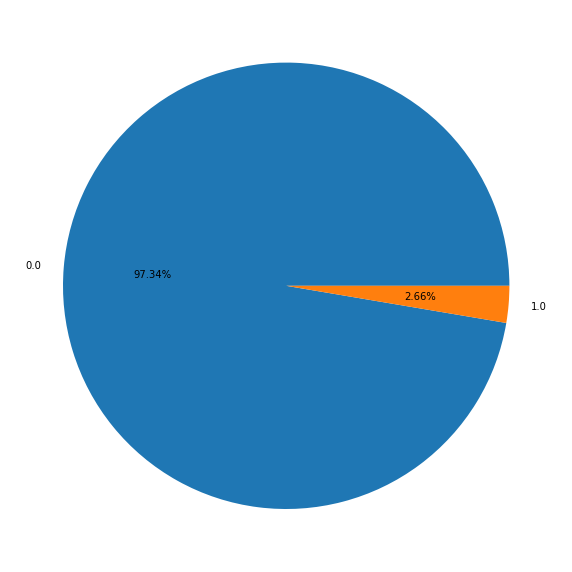

In [16]:
merged_pie = merged_bill_grammy_copy.groupby("grammy_win", as_index = False).agg({"Name": "count"})
plt.figure(figsize = (10,15))
_ = plt.pie(merged_pie["Name"],labels= merged_pie["grammy_win"],autopct="%1.2f%%")

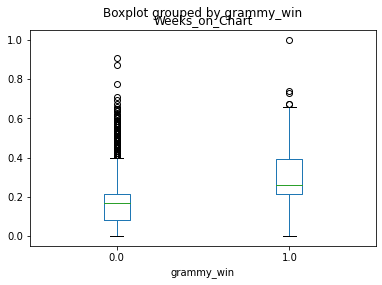

In [17]:
#boxplot to detect outlier

boxplot = merged_bill_grammy_copy.boxplot(by='grammy_win' ,column=['Weeks_on_Chart'],grid=False)


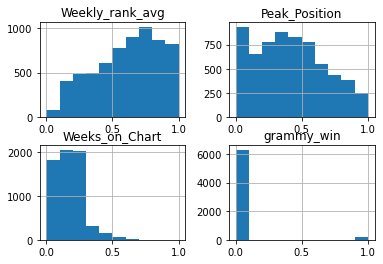

In [18]:
# create histogram for numeric data
merged_bill_grammy_copy.hist()
  
# show plot
plt.show()

In [25]:
#remove outliers and oversample the data after test split

def outlier(dataframe,i):
    # question that has outliers (understands from the boxplot) 
    outlierQuestion=dataframe[i]
    # finding the 1st quartile
    q1 = np.quantile(outlierQuestion, 0.25)
     
    # finding the 3rd quartile
    q3 = np.quantile(outlierQuestion, 0.75)
     
    # finding the interquartile range
    iqr = q3-q1
  
    # finding upper and lower whiskers
    upperBound = q3+(1.5*iqr)
    lowerBound = q1-(1.5*iqr)
    #print(iqr, upperBound, lowerBound)
    outliers = outlierQuestion[(outlierQuestion <= lowerBound) | (outlierQuestion >= upperBound)]
    print(outliers)
   
   for j in i:
      dataframe[j].replace(outliers.values,dataframe[j].mode()[0],inplace=True)
      print(dataframe[j])

In [33]:
removed_oulierBill=pd.read_csv("edited_bill.csv")

In [35]:
removed_oulierBill.head()

,Unnamed: 0,Artist,Name,Weekly_rank_avg,Peak_Position,Weeks_on_Chart,Genre
0,0,"Lil Nas,",OLD TOWN ROAD,16.478261,1.0,7.0,"Country,Atlanta,Alternative Country,Hip-Hop,Tr..."
1,1,"Shawn Mendes, Camila Cabello",SENORITA,41.736842,NaN,NaN,Pop
2,2,Billie Eilish,BAD GUY,48.000000,2.0,13.0,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ..."
3,3,Khalid,TALK,34.414634,3.0,20.0,"Synth-Pop,Pop"
4,4,"Ed Sheeran, Justin Bieber",I DON'T CARE,38.900000,2.0,7.0,"Canada,UK,Dance,Dance-Pop,Pop"


Series([], Name: Weeks_on_Chart, dtype: float64)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


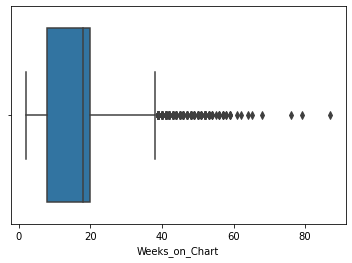

In [57]:
#detect outliers before normalization
# Box Plot
import seaborn as sns
sns.boxplot(removed_oulierBill['Weeks_on_Chart'])
#sns.boxplot(removed_oulierBill['Weekly_rank_avg'])
#sns.boxplot(removed_oulierBill['Peak_Position'])

outlier(removed_oulierBill,"Weeks_on_Chart")

In [58]:
# Position of the Outlier
#only weekly on chart has outliers 
outlier_woc=np.where(removed_oulierBill['Weeks_on_Chart']>40)
outlier_woc

(array([  24,   31,   34,   40,   44,  137,  164,  170,  177,  188,  214,
         215,  285,  408,  411,  453,  496,  638,  640,  641,  736,  739,
         835,  845,  859,  874,  887,  888,  913,  945,  948,  963,  976,
        1049, 1061, 1096, 1138, 1251, 1252, 1325, 1417, 1426, 1432, 1509,
        1550, 1592, 1599, 1620, 1646, 1700, 1701, 1805, 1859, 1867, 1887,
        1894, 1916, 1974, 2033, 2036, 2067, 2079, 2121, 2161, 2188, 2209,
        2214, 2233, 2244, 2245, 2262, 2329, 2365, 2376, 2421, 2448, 2531,
        2537, 2551, 2569, 2579, 2594, 2605, 2611, 2618, 2669, 2691, 2766,
        2772, 2778, 2791, 2833, 2871, 2887, 2950, 3124, 3195, 3431, 3478,
        3497, 3611, 3643, 3799, 3819, 3839, 3864, 3927, 4129, 4197, 4198,
        4208, 4258, 4344, 4458, 4467, 4523, 4632, 4695, 4835, 4882, 4946,
        5028, 5073, 5182, 5198, 5254, 5287, 5351, 5379, 5485, 5674, 5732,
        5756, 5817, 5818, 5848, 5858, 5867, 5980, 5981, 6019, 6048, 6149,
        6150, 6194, 6324], dtype=int64